## 시각화 패키지 (matplotlib) 연습문제

In [2]:
# 한 셀에서 여러 변수 출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
# 매직 명령 : 주피터 노트북 사용 시
# 노트북 내부에 그림을 표시하도록 지정하는 명령어

In [4]:
import pandas as pd
import numpy as np

In [6]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### 문제 1
- 다음의 데이터프레임을 사용하여 그림과 같이 개인별 몸무게를 수평 바 차트로 표현
- 몸무게 기준 내림차순 정렬

<Axes: >

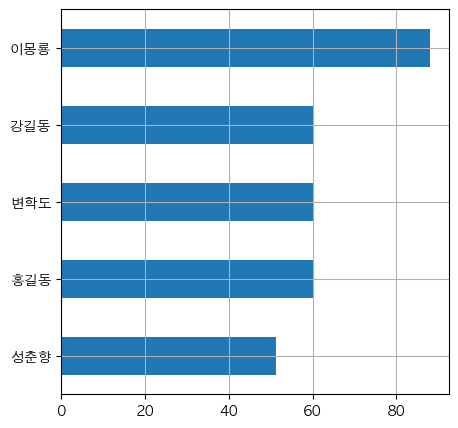

In [179]:
data = [
    [22, 60.1, 170.5, '남', '서울'],
    [45, 51.3, 160.5, '여', '부산'],
    [23, 88.1, 175.5, '남', '대구'],
    [33, 60.1, 180.5, '남', '제주'],
    [40, 60.1, 173.5, '남', '강릉']    
]

columns = ['나이', '몸무게', '키', '성별', '주소']
index = ['홍길동', '성춘향', '이몽룡', '변학도', '강길동']

df1 = pd.DataFrame(data, index=index, columns=columns)
df1['몸무게'].sort_values().plot(kind='barh', grid=True, figsize=(5,5))
plt.show()

In [ ]:
df1.sort_values('몸무게')

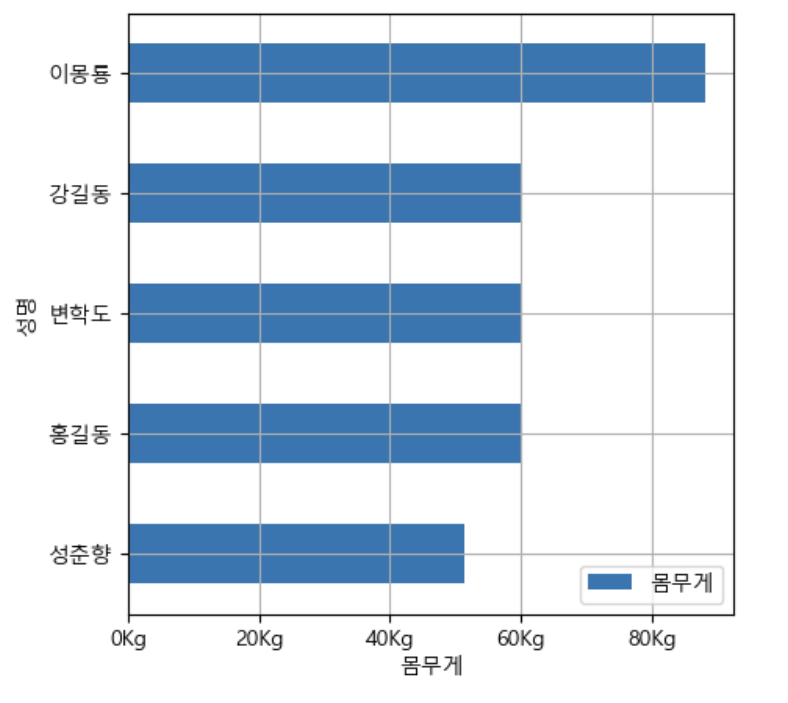

### 문제 2
- 다음의 데이터프레임을 사용하여 그림과 같이 도시별로 연도에 따른 인구수 변화를 라인 차트로 표현

<Axes: >

([<matplotlib.axis.XTick at 0x14fb846d0>,
 [Text(0, 0, '2000'),
  Text(1, 0, '2005'),
  Text(2, 0, '2010'),
  Text(3, 0, '2015')])

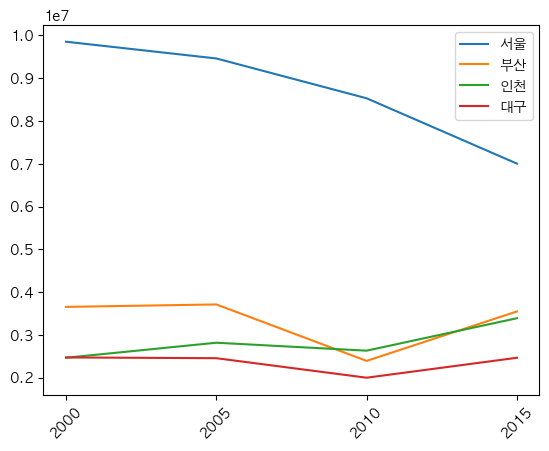

In [180]:
## 데이터프레임으로 line plot 그리기
data = {
    '지역':['수도권', '경상권', '수도권', '경상권'],
    "2015": [7004312, 3548737, 3390451, 2466052],
    "2010": [8531482, 2393191, 2632035, 2000002],
    "2005": [9462546, 3712547, 2817680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990]
}

# 행방향 인덱스 (index)
index = ['서울', '부산', '인천', '대구']

df2 = pd.DataFrame(data, index=index)


# city_df = df2.loc[:, '2015':'2000']
city_df = df2[['2000', '2005','2010','2015']]
city_df = city_df.T

city_df.plot(kind='line')
plt.xticks(range(len(city_df.index)), city_df.index, rotation=45)
plt.show()

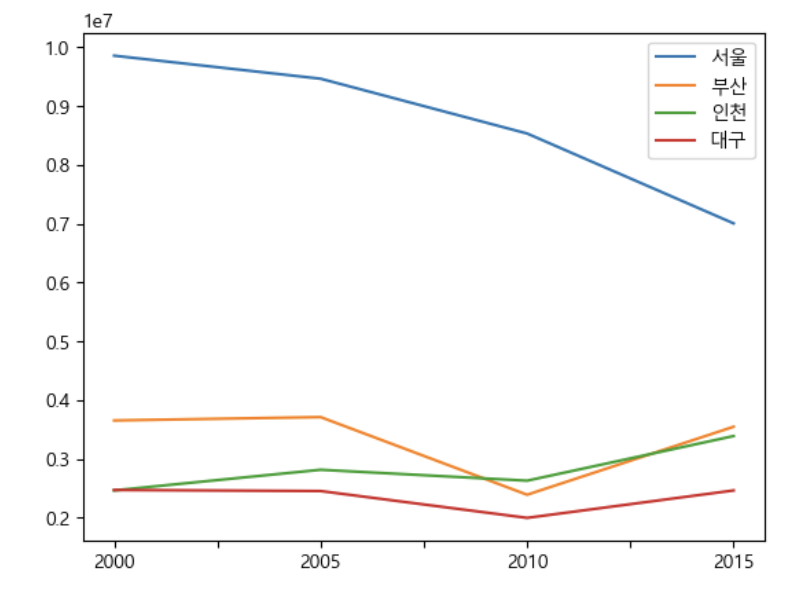

### 문제 3
- population_in_Seoul.csv 파일을 사용하여 그림과 같이 자치구별 65세이상고령자 수를 바 차트 표현

<Axes: xlabel='자치구'>

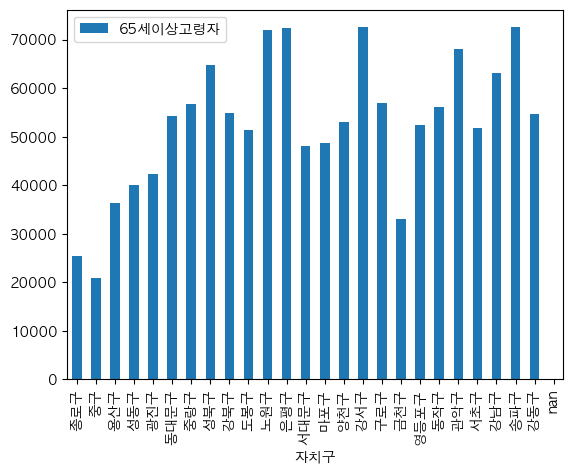

In [181]:
# 위에 몇 열이 문자열이라, thousands적용이 안됨 '2,300,300' -> 숫자로 바꾸면 ','가 문제가 생김
# 애초에 위 열 빼고 읽기
df = pd.read_csv('../data/population_in_Seoul.csv',thousands=',', skiprows=[1,2,3])
df.set_index('자치구',inplace=True)


elder_df = df[['65세이상고령자']]  
elder_df.plot(kind='bar')
plt.show()

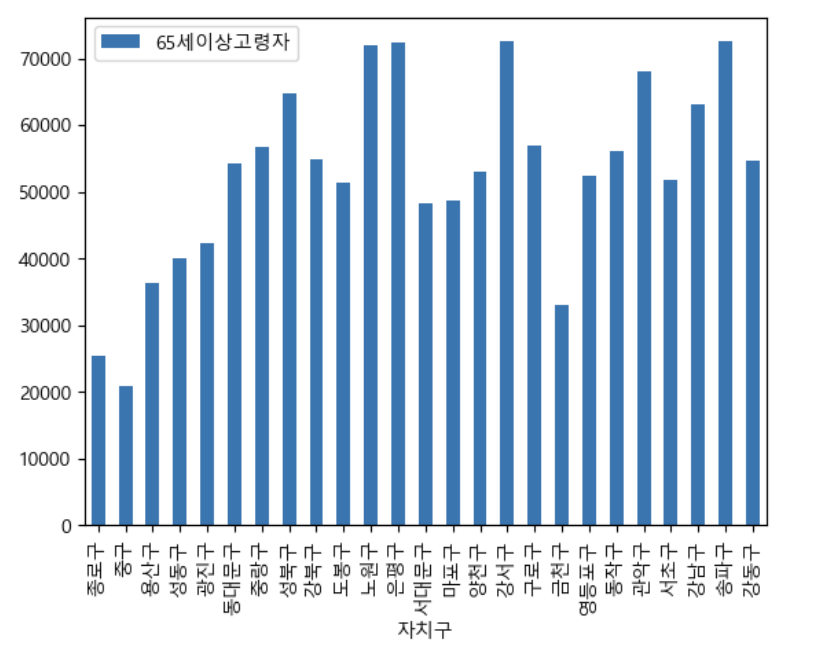